In [22]:
from IPython.display import display, Image  # This line lets you display images. We'll use that in a bit.

# This line lets you use python to download data from the web.
import requests

### Exercise 1

Write a function that takes in the width and height and prints an image

In [46]:
new = 2

In [54]:
def get_cat(width, height):
    n = requests.get(f'http://www.placekitten.com/{width}/{height}')
    display(Image(n.content))

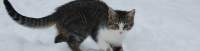

In [55]:
get_cat(200, 51)

### Exercise 2

Can you write a loop to show several images?


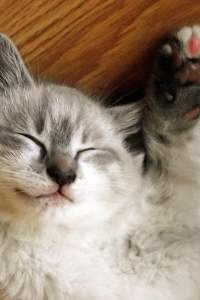

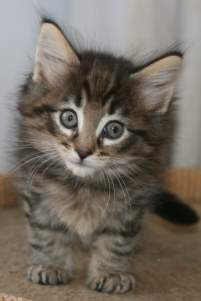

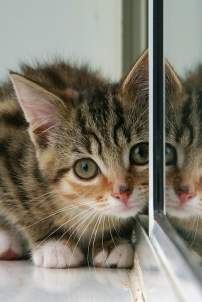

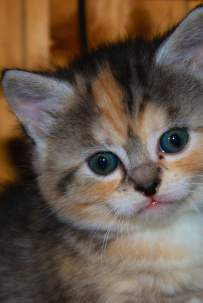

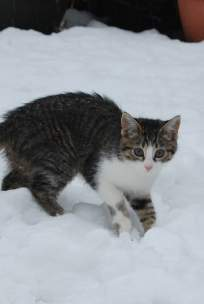

In [45]:
n_images = 5

for i in range(0, n_images):
    width_image = 200 + i
    height_image = 300 + i
    get_cat(width_image, height_image)

In [ ]:
for width in [200, 300]:
    for height in [300, 500, 600]:
        get_cat(width, height)

### Exercise 3

Use the .json() function to get the response converted to a dictionary or list

In [ ]:
j = requests.get('http://worldtimeapi.org/api/timezone')
new_dictionary = j.json()
print(new_dictionary)

### Exercise 4

Get the time for your time zone

In [69]:
r = requests.get('http://worldtimeapi.org/api/timezone/America/Indiana/Indianapolis')

In [79]:
r.json()

{'abbreviation': 'EDT',
 'client_ip': '128.210.107.130',
 'datetime': '2021-10-21T18:18:23.754494-04:00',
 'day_of_week': 4,
 'day_of_year': 294,
 'dst': True,
 'dst_from': '2021-03-14T07:00:00+00:00',
 'dst_offset': 3600,
 'dst_until': '2021-11-07T06:00:00+00:00',
 'raw_offset': -18000,
 'timezone': 'America/Indiana/Indianapolis',
 'unixtime': 1634854703,
 'utc_datetime': '2021-10-21T22:18:23.754494+00:00',
 'utc_offset': '-04:00',
 'week_number': 42}

In [62]:
json_indiana['datetime']

'2021-10-21T18:13:36.527983-04:00'

In [68]:
dt = json_indiana['datetime']
break_point = dt.find('T')
break_point_2 = dt.find('.')
time = dt[break_point + 1:break_point_2]
time

'18:13:36'

In [80]:
from datetime import datetime

In [90]:
dt = datetime.strptime(json_indiana['datetime'], "%Y-%m-%dT%H:%M:%S.%f%z")

In [91]:
print(f"{dt.hour}:{dt.minute}")

18:13


### Exercise 5

Get the time for your IP address

In [102]:
r = requests.get('http://worldtimeapi.org/api/ip')

In [104]:
curr_time = r.json()

In [105]:
dt = datetime.strptime(curr_time['datetime'], "%Y-%m-%dT%H:%M:%S.%f%z")

In [106]:
print(f"{dt.hour}:{dt.minute}")

18:48


## Exercise 6

Review the documentation (and Google) to see if you can figure out how to get a list of all of the users who have ever edited the most recently edited Wikipedia page.

In [167]:
endpt = 'https://en.wikipedia.org/w/api.php'


def get_last_pages_changed(n):
    params = {'action': 'query',
          'format': 'json',
          'list': 'recentchanges',
          'rcnamespace': '0',
          'rclimit': n}
    r = requests.get(endpt, params=params)
    #print(r.json())
    #print(r.json()['query']['recentchanges'])
    result = []
    content = r.json()['query']['recentchanges']
    for page in content:
        result.append(page['title'])
    return result


def get_contributors():
    result = []
    while True:
        params = {'action': 'query',
          'format': 'json',
          'prop': 'contributors',
          'titles': get_last_pages_changed(1)[0],
            'pclimit': 500}
        r = requests.get(endpt, params=params)
        #print(r.json())
        info = r.json()['query']['pages']
        for page, page_info in info.items():
            contributors = page_info['contributors']
            for user in contributors:
                result.append(user['name'])
        try:
            pccontinue = r.json()['continue']['pccontinue']
            params['pccontinue'] = pccontinue
        except KeyError:
            break
    return result

In [ ]:
get_contributors()

In [1]:
import tweepy

from twitter_authentication import CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# We then create an api object, based on the auth object created with your credentials
api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
result = []
skipped_count = 0
for tweet in tweepy.Cursor(api.search_tweets,'(rubric OR rubrics) AND (education OR classroom OR score OR class* OR teacher*) lang:en -is:retweet', 
                           tweet_mode = 'extended', 
                           count = 100).items(5000):
                        if 'retweeted_status' in tweet._json:
                            skipped_count += 1
                        else:
                            #print(tweet)
                            print(tweet.full_text)
                            result.append(tweet._json)

@PupusaClerk Went over one of my exams with a prof who had points on his rubric for something we never learned in class and that only ppl with pre-law school connections to the law would know 😌
#Finalsweek

Wrote my leadership development paper for Leadership in Organizations class (30% of my grade)
 
I wrote about the second time I experienced leadership as a Brownie in  @girlscouts my first was in church.

Scored an A+ with really GREAT rubric critique from the prof.
And as I mentioned at the end of the podcast, we want to get the pulse of the fanbase on this basketball roster. 

Here's the 1st ever WHS Power Rankings.

Score each player 1-100 based on importance to the team (or any rubric you want tbh).

https://t.co/8nfirq2ttl https://t.co/WnHMkTxQlE
Hi PE teachers, does anyone have any good create-a-game rubrics or projects out there. I’m looking to do one for my Individual / Dual Activities class. Any help would be appreciated. #PhysEd #PE #SecPhysEd #ElemPhysEd #SHAPEPhysEd
Wow!

In [6]:
skipped_count

63

In [7]:
len(result)

147

# Exercises


7. Use the streaming API to produce a list of 1000 tweets about a topic.

8. From that list of 1000 tweets, eliminate retweets.

9. For each original tweet, create a dictionary with the number of times you see it retweeted in your dataset.

10. Get a list of the URLs in your dataset

11. Now, see if you can figure out how to eliminate retweets in the query instead.

12. Get the last 50 tweets from West Lafayette, using the search API. (Hint - look up the geocode information [here]

(https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets)).

13. Alter the streaming algorithm to include a "locations" filter to get tweets from New York City. You need to use the order sw_lng, sw_lat, ne_lng, ne_lat for the four coordinates instead of a radius as in the search API.

### BONUS Questions
1. For each of your followers, get *their* followers (investigate time.sleep to throttle your computation).

In [2]:
f = []
for follower in tweepy.Cursor(api.get_followers, screen_name='jdfoote', count=200).items():
    #print(follower.screen_name)
    f.append(follower)

In [105]:
import pandas as pd

df = pd.DataFrame({'screen_name' : [x.screen_name for x in f],
                  'id': [x.id for x in f],
                   'protected': [x.protected for x in f],
                   'followers': [x.followers_count for x in f],
                   'follow_count': [x.friends_count for x in f]
                  })
df.to_csv('follower_list.csv', index = False)

In [97]:
out_file = './twitter_edgelist.csv'
try:
    edgelist = pd.read_csv(out_file)
    last_user = edgelist.iloc[-1, 1]
    print(last_user)
    # Remove the last user, in case we didn't get all of them
    edgelist = edgelist.loc[edgelist.user != last_user,]
    retrieved = edgelist.user
except FileNotFoundError:
    edgelist = pd.DataFrame({'follower': [], 'user':[]})
    retrieved = []
edgelist.to_csv(out_file, index=False)

15399701


In [98]:
followers = pd.read_csv('follower_list.csv')
to_retrieve = followers[(~followers.id.isin(retrieved)) & (followers.protected == False)]
print(len(to_retrieve))
with open('./twitter_edgelist.csv', 'a') as fn:
    out_file = csv.writer(fn)
    curr_user = 1
    for index, user in to_retrieve.iterrows():
        if user.followers > 150000:
            print(f"Too many followers for {user.screen_name}. Skipping")
            continue
        print(f"Retrieving user {curr_user} {(user.screen_name, user.id)}")
        curr_user += 1
        if user.protected == True:
            continue
        for follower in tweepy.Cursor(api.get_follower_ids, user_id=user.id).items():
            out_file.writerow((follower, user.id))

12
Retrieving user 1 ('jf_accountable', 927760776277917697)
Retrieving user 2 ('Gerardo45420577', 857933309485105152)
Retrieving user 3 ('SherieBrown3', 3886453934)
Retrieving user 4 ('priestnelson', 253810056)
Retrieving user 5 ('dore_sue', 2733936399)
Retrieving user 6 ('ZaynMal13872699', 774562754)
Retrieving user 7 ('williamswww79', 620214973)
Retrieving user 8 ('avrilkie', 457068258)
Too many followers for Imaginedragons. Skipping
Retrieving user 9 ('ccpmabelferreyr', 80109065)
Too many followers for mattflannery. Skipping
Retrieving user 10 ('fr0ke', 15399701)


2. Identify the follower you have that also follows the most of your followers.

In [128]:
edgelist = pd.read_csv('./twitter_edgelist.csv')

In [129]:
edgelist = edgelist.merge(followers, how='inner', left_on='follower', right_on='id')
edgelist = edgelist.drop(columns='id')

In [134]:
edgelist = edgelist.rename(columns={'screen_name':'follower_name'})

In [138]:
edgelist = edgelist.merge(followers.loc[:,['id', 'screen_name']], how = 'inner', left_on='user', right_on='id')

In [143]:
edgelist = edgelist.rename(columns={'screen_name':'followee_name'})

In [145]:
edgelist.to_csv('/home/jeremy/Desktop/DeleteMe/misc_data/twitter_edgelist_202110.csv')

In [151]:
edgelist.groupby('follower_name').size().sort_values(ascending=False).head(20)

follower_name
noshir            165
dgzara            157
docmattweber      142
groceryheist      141
bkeegan           139
jacobgroshek      131
kjs8918           127
eredmil1          125
arvidmartin       125
aschrock          124
jsradford         124
aaronshaw         123
george_berry      118
jeffbigham        117
cuihua            113
BrendanNyhan      112
JohnHolbein1      112
renwenzhang       109
foucaultwelles    108
MoritzBuchi       107
dtype: int64

In [152]:
edgelist

,follower,user,follower_name,protected,followers,follow_count,id,followee_name
0,38341407,1144776240701874178,cameronpiercy,False,866,1759,1144776240701874178,Communalytic
1,3261620311,1144776240701874178,KavehKadkhoda,False,320,1458,1144776240701874178,Communalytic
2,2240601558,1144776240701874178,Dilrukshi_LK,False,1086,2300,1144776240701874178,Communalytic
3,123834795,1144776240701874178,satyaki30,False,347,983,1144776240701874178,Communalytic
4,1056715997372014592,1144776240701874178,AnujaMajmundar,False,445,778,1144776240701874178,Communalytic
...,...,...,...,...,...,...,...,...
24134,237905252,253671189,LDSVineyard,False,1552,418,253671189,mercadomormon
24135,54172126,253671189,PortalSUD,False,927,936,253671189,mercadomormon
24136,107541219,114656167,skypipermusic,False,493,1112,114656167,goldenveins
24137,616389505,126737523,bouncylandenter,False,24,125,126737523,sturmoor


In [153]:
# People who are followed by the most of my followers
edgelist.groupby('followee_name').size().sort_values(ascending=False)


followee_name
bkeegan           307
davidlazer        254
noshir            252
foucaultwelles    249
aaronshaw         228
                 ... 
gil_pulgar          1
fr0ke               1
robinc              1
thinkplay           1
zhugrid             1
Length: 644, dtype: int64

In [161]:
# People with the largest propotion of their follows who are my followers

good_taste = edgelist.groupby('follower_name').size().to_frame(name='follows_my_followers').merge(followers, how='inner', left_index=True, right_on='screen_name')
good_taste['prop_followers'] = good_taste.follows_my_followers / good_taste.follow_count

good_taste.sort_values('prop_followers', ascending = False)


,follows_my_followers,screen_name,id,protected,followers,follow_count,prop_followers
63,20,LINKatNU,1315700310262898688,False,29,35,0.571429
523,70,ktanaka086,1419910621,False,209,151,0.463576
580,24,CollabLabNU,2986831175,False,50,63,0.380952
528,56,MarlonTwyman2,2336152236,False,164,159,0.352201
591,66,comdatasci,2923870245,False,520,189,0.349206
...,...,...,...,...,...,...,...
688,1,QuoteResearch,565264651,False,12231,6812,0.000147
763,1,rentalic,42095430,False,5448,7092,0.000141
390,15,salesforce,33612317,False,556527,148529,0.000101
798,4,powertwitter,18656830,False,48852,46697,0.000086


3. How many users follow you but none of your followers?